# Exercise 3.1
 Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.
Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb.

# Import libraries

In [25]:
import pandas as pd
import nsfg
import thinkstats2
import thinkplot

In [26]:
df = nsfg.ReadFemResp()
df

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7638,11018,1,5,2,5,3.0,34,34,811,34,...,0,3247.445399,3784.333145,6565.818007,2,76,1228,1216,15:57:38,82.907333
7639,6075,5,5,3,5,3.0,17,17,1014,17,...,0,2273.211779,2497.234491,4392.385746,2,76,1228,1216,18:23:53,54.044833
7640,5649,1,5,2,5,5.0,29,29,873,29,...,0,3247.445399,3569.313710,6003.228729,2,76,1228,1216,18:42:41,68.168000
7641,501,5,5,3,5,2.0,16,16,1034,16,...,0,5304.160818,5954.644352,10473.623950,2,76,1228,1216,16:02:45,32.717333


# Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

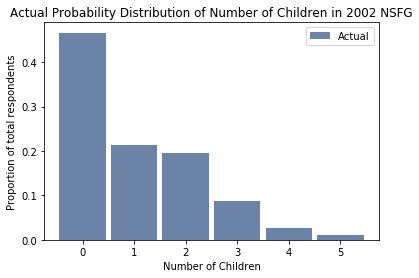

Mean number of children: 1.024


<Figure size 576x432 with 0 Axes>

In [57]:
Actual_PMF = thinkstats2.Pmf(df.numkdhh, 'Actual')
thinkplot.Hist(Actual_PMF)
thinkplot.Show(xlabel = 'Number of Children', 
               ylabel = 'Proportion of total respondents', 
               title  = 'Actual Probability Distribution of Number of Children in 2002 NSFG')
print('Mean number of children: %s' % float('%.4g' % Actual_PMF.Mean()))

# Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

### First create a BiasPmf function:

In [44]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

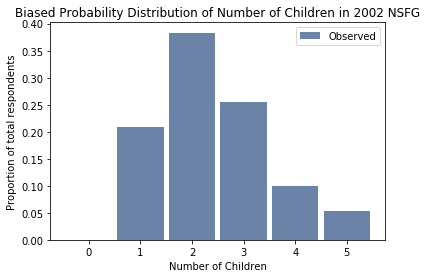

Mean number of children: 2.404


<Figure size 576x432 with 0 Axes>

In [61]:
Biased_PMF = BiasPmf(Actual_PMF, 'Observed')
thinkplot.Hist(Biased_PMF)
thinkplot.Show(xlabel = 'Number of Children', 
               ylabel = 'Proportion of total respondents', 
               title  = 'Biased Probability Distribution of Number of Children in 2002 NSFG')
print('Mean number of children: %s' % float('%.4g' % Biased_PMF.Mean()))

# Plot the actual and biased distributions, and compute their means. 

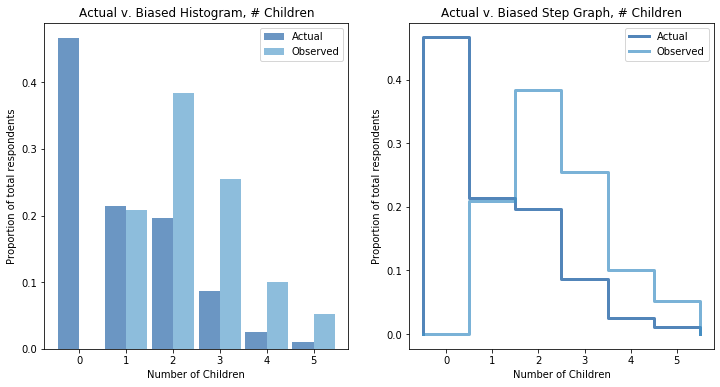

<Figure size 576x432 with 0 Axes>

In [62]:
thinkplot.PrePlot(2, cols=2)
width = 0.45
thinkplot.Hist(Actual_PMF, align='right', width=width)
thinkplot.Hist(Biased_PMF, align='left', width=width)
thinkplot.Config(xlabel = 'Number of Children', 
                 ylabel = 'Proportion of total respondents', 
                 title  = 'Actual v. Biased Histogram, # Children')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([Actual_PMF, Biased_PMF])
thinkplot.Show(xlabel = 'Number of Children', 
               ylabel = 'Proportion of total respondents', 
               title  = 'Actual v. Biased Step Graph, # Children')

In [63]:
print('Actual Mean number of children: %s' % float('%.4g' % Actual_PMF.Mean()))
print('Biased Mean number of children: %s' % float('%.4g' % Biased_PMF.Mean()))

Actual Mean number of children: 1.024
Biased Mean number of children: 2.404
